In [1]:
import pandas as pd
import brainlit
from brainlit.utils import *
import csv
import pandas as pd
import numpy as np
import pickle
import time
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from statsmodels.discrete.discrete_model import Logit
from sklearn.metrics import plot_roc_curve
from sklearn import datasets, metrics, model_selection

from keras.models import Sequential
from keras.layers import Dense,  Activation
from keras.regularizers import L1L2
from keras.utils import plot_model

from sklearn.preprocessing import LabelEncoder
from scipy import stats
import seaborn as sns

from brainlit.viz import *
from brainlit.utils.combine_swc_img import *

Using TensorFlow backend.


In [25]:
url = "s3://mouse-light-viz/precomputed_volumes/brain1"
ngl_skel = NeuroglancerSession(url+"_segments", mip=1)
working_ids = []
for seg_id in range(300):
    try:
        segment = ngl_skel.cv.skeleton.get(seg_id)
        working_ids.append(seg_id)
    except:
          pass

print (working_ids)

Downloading: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20.29it/s]


Downloading: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 35.60it/s]


Downloading: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 41.00it/s]


Downloading: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 21.23it/s]


Downloading: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.22it/s]

[2, 7, 11, 12, 13, 14, 20, 24, 28, 35, 40, 45, 48, 49, 51, 53, 59, 60, 65, 67, 69, 71, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 83, 85, 86, 91, 97, 98, 99, 101, 103, 106, 107, 109, 111, 112, 115, 118, 120, 124, 126, 127, 129, 132, 133, 136, 137, 140, 141, 142, 143, 144, 145, 146, 147, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 205, 207, 208, 214, 223, 224, 225, 227, 228, 229, 230, 231, 232, 234, 235, 236, 237, 240, 243, 246, 247, 248, 249, 250, 252, 253, 254, 255, 256, 257, 258, 259, 261, 262, 265, 266, 267, 269, 270, 271, 272, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 291, 293, 294, 295, 296, 298]


Plotting bounding vertices using "pull_chunk". pull_chunk returns the cordinates of the initial point in the volume in the variable "vox" plotted in blue. The [15,15,15] offset for it is plotted in orange.

In [35]:
seg_id = working_ids[5]
v_id = 1
ngl = NeuroglancerSession(url,mip=1)
whole_img,b,vox = ngl.pull_chunk(seg_id,v_id)
bounds = Bbox(vox,vox+np.array([1,1,1]))
b = bounds.to_list()
v1 = b[3:]
v2 = b[:3]
b_off = bounds + [15,15,15]
b_off = b_off.to_list()
v1_off = b_off[3:]
v2_off = b_off[:3]

Downloading: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.57it/s]


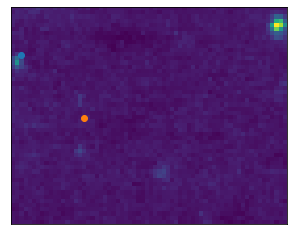

In [36]:
fig, axis = plot_image_2d(whole_img[:,49,:])
axis.scatter(v1[0], v1[2])
axis.scatter(v1_off[0], v1_off[2])

Plotting bounding vertices using "pull_voxel". pull_voxel returns the cordinates of the initial point in the volume in the variable "vox" plotted in blue. The [15,15,15] offset for it is plotted in orange.

In [37]:
seg_id = working_ids[5]
v_id = 1
ngl = NeuroglancerSession(url,mip=1)
whole_img,b,vox = ngl.pull_voxel(seg_id,4,20,20,20)
bounds = Bbox(vox,vox+np.array([1,1,1]))
b = bounds.to_list()
v1 = b[3:]
v2 = b[:3]
b_off = bounds + [15,15,15]
b_off = b_off.to_list()
v1_off = b_off[3:]
v2_off = b_off[:3]

Downloading: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.30it/s]


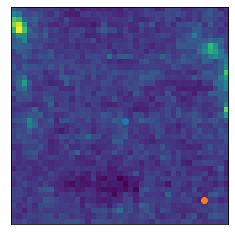

In [39]:
fig, axis = plot_image_2d(whole_img[:,2,:])
axis.scatter(v1[0], v1[2])
#axis.scatter(v2[1], v2[2])
axis.scatter(v1_off[0], v1_off[2])
#axis.scatter(v2_off[1], v2_off[2])

Plotting bounding vertices using "get_voxel".

In [40]:
seg_id = working_ids[0]
v_id = 1
ngl = NeuroglancerSession(url,mip=1)
whole_img,b,vox = ngl.pull_voxel(seg_id,v_id,20,20,20)
vox1 = ngl._get_voxel(seg_id,v_id)
bounds = Bbox(vox1,vox1+np.array([1,1,1]))
b = bounds.to_list()
v1 = b[3:]
v2 = b[:3]
b_off = bounds + [15,15,15]
b_off = b_off.to_list()
v1_off = b_off[3:]
v2_off = b_off[:3]

Downloading: 100%|███████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32.80it/s]


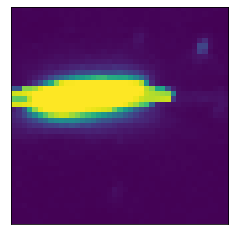

In [41]:
fig, axis = plot_image_2d(whole_img[:,40,:])

Scattering the coordinates obtained from _get_voxel. The coordinates lie outside the image pulled

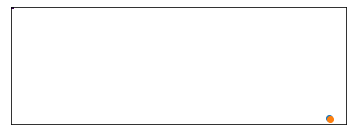

In [42]:
fig, axis = plot_image_2d(whole_img[:,40,:])
axis.scatter(v1[0], v1[2])
#axis.scatter(v2[1], v2[2])
axis.scatter(v1_off[0], v1_off[2])
#axis.scatter(v2_off[1], v2_off[2])